## Models Makes and Accident Rates: Which Aircraft is Safest?

* Student name: Ariella Cerasuolo 
* Student pace: Self paced
* Scheduled project review date/time: Monday, December 11th, 2023 @2:00pm
* Instructor name: Morgan Jones
* Blog post URL: https://www.blogger.com/blog/post/edit/4908376541306918343/1322238248945680013?hl=en


#  What Makes a Safe Flight?

In the dynamic world of aviation, the acknowledgment that complete risk elimination is challenging sets the stage for our exploration. The focus of this project lies in strategies aimed at minimizing risk by prioritizing passenger safety. 

The critical importance of passenger safety in the decision-making process is duly recognized, given the potential severe repercussions a fatal accident could inflict on a company's reputation and financial stability.

This analysis specifically aims to provide recommendations on:
Obviously there are other factors that can determine a safe or unsafe flight, but these listed are, in my opinion, the most important

## The Dataset: Unveiling Insights from 1948 to 2023

The dataset, provided by the 'National Transportation Safety Board,' spans aviation accident data from 1948 to 2023. Our primary focus is on data from 1981 to 2023, as earlier data offers limited insights into fatality rates. 

## Understanding the Dataset and How it's Accessed
First we need to import all the necessary tools:

1. *Pandas*, which allows us to read the file
2. *Numpy*, for data manipulation and filtering (in this case "Cleaning")
3. *MatPlotLib*, for visulization
4. *MatPlotLib Inline*, to display interactive plots directly in the cells.

In [44]:
#Import Pandas, NumPy, MatPlotLib, as well as set MatPlotLib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Next we need to read the file and assign it the variable *df* and look at the first 10 rows to see that its running.

In [45]:
#Check first 20 rows of data using .head()
df = pd.read_csv("data/Aviation_Data.csv")
df.head()

C:\Users\ariel\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Now, we'll deal with missing data.

The first step is to see what columns have missing data.

How much data is missing from each column?

In [46]:
#Check for the number of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

As we can see here, most of the columns are missing well over 1000 rows of data.

Our best bet is to drop unnecessary columns and to clean up rows!

## Dropping Unnecessary Columns

As stated before, I am making reccomendations based off 3 things:

1. Makes and models of airplanes with the lowest percentages of injuries

2. Safety protocals and proper maintenance checks provided by which companies

3. Weather conditions and how they contribute to fatality rates

Now lets get into what needs to be dropped and why.

To start, with only 90348 rows in all, any column missing more than half of it's data might be considered useless depending on just how important the column is.

Lets determine which columns this issue pertains to.

In [47]:
#Set the "threshold" for checking if a column is missing half (0.5) it's data
threshold = 0.5 

#Check the percentage of missing values for each column
missing_percentage = (df.isnull().mean())

#Identify columns with more than half of their data missing and label it DHM_columns (Data Half Missing)
DHM_columns = missing_percentage[missing_percentage > threshold].index.tolist()

print(DHM_columns)


['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier']


The columns listed above are all missing *more* than half their data (**'Latitude', 'Longitude', Aircraft.Category', 'FAR.Description', 'Schedule', Air.carrier**)

Because "**Aircraft.Category**" is what *type* of aircraft, (jet, hot air balloon, etc.), we will deal with it in the "cleaning rows" section.

All else is does not help in deciphering the risks of each aircraft so they can be dropped

In [48]:
#Drop above list
df.drop(['Latitude', 'Longitude',  
         'FAR.Description',
        'Schedule', 'Air.carrier'],
        axis=1, inplace=True)

In [49]:
#Check sum of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: int64

Other Unnecessary columns include:


1. **Accident.Number**: This is also a column that is specific to each individual flight.
2. **Registration.Number**: Once again flight specific so we are unable to use it properly.
3. **Report.Status**:Most of entries in this column are labeled "Probable Cause". Because of the lack of information that this column provides, it'll be dropped.
4. **Publication.Date**: This does not add to the "risk-factor" so it's not needed for our research.
5. **Airport.Code**: Although Airport can have something to do with risk factor, seeing as we dont have the information required to determine the probable cause (Pilot, Protocals, ect). it will be dropped
6. **Airport.Name**: Same reasoning as **Airport.Code**
7. **Purpose.of.Flight**: Seeing as whether or not the flight was "Business" or "Personal" doesnt add to the risk factor, it can be dropped.

In [50]:
#Drop the list above and remove the variables (columns) completely
df.drop(['Accident.Number', 'Registration.Number', 'Purpose.of.flight', 
        'Airport.Code', 'Airport.Name', 'Report.Status', 'Publication.Date'],
          axis=1 , inplace=True)

In [51]:
#Check sum of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64

Now that we have all the columns we need, it's time to drop rows within specific columns.

## Cleaning Make and Model 

Since our most important rows stem from **Models**, **Makes** and type of **Aircraft**, the empty rows in those columns, as well as anything that is not an *airplane*, will be the ones we clean first.

First I want to create a column called **Make.and.Model**, so that we can compare all data that's supposed to be labeled with the value *Airplane* within the **Aircraft.Category** to this new column and fill it in.

In [52]:
#Create a new column with Make and Model together
df['Make.and.Model'] = (df['Make'].str.upper() + " " + df['Model'].str.upper())
df.head(20)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,CESSNA 180
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,CESSNA 140
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,CESSNA 401B
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,NORTH AMERICAN NAVION L-17B


Next i want to find the values that correspond with *Airplane* in **Make.and.Model** and assign it to a variable.

In [53]:
#Find values in 'Make and Model' corresponding to 'Airplane' in 'Aircraft.Category'
airplane_make_models = df.loc[df['Aircraft.Category'] == 'Airplane', 'Make.and.Model'].unique()

#Convert the unique values to a Python list
airplane_make_models_list = airplane_make_models.tolist()

 

I will refrain from printing the list as I suspect it is long, which is why we assigned it to a variable.

Next, I want to fill in the values that should be labeled "Airplane" based off "Make and Model" data.

In [54]:
#Fill 'Aircraft.Category' column with 'Airplane' for Make and Model values
df['Aircraft.Category'] = df.apply(lambda row: 'Airplane' if pd.isna(row['Aircraft.Category']) and row['Make.and.Model'] in airplane_make_models else row['Aircraft.Category'], axis=1)

#Print the first 20 rows
df.head(20)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Airplane,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,CESSNA 180
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,CESSNA 140
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,CESSNA 401B
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,NORTH AMERICAN NAVION L-17B


Lets check what missing data is left.

In [55]:
#Check the sum
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         17571
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Make.and.Model             1571
dtype: int64

That should definently help in the decision making process.

I'm going to fill The rest of the "NaNs" with the value "Unknown"

In [56]:
#Fill NaN values with "Unknown"
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')

Now, the only independent column so far that requires having absolutely no missing data is **Make and Model**, were going to remove all NaN values.

In [57]:
#Drop NaN values from "Make and Model"
df.dropna(subset=['Make.and.Model'], inplace=True)

Let's check one more time for now!

In [58]:
#Check the sum
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Make.and.Model                0
dtype: int64

## Passengers Injured and Aircraft Damage

Next were going to filter through all the "Injuries" data and start working towards our goal of picking the safest aircraft.
A few things I want to do here.
1. Find missing data
2. Find the total number of passenger on each flight 
3. Make a new column for total number of passengers 
4. Make a new column for passengers and damage and clear all NaN data 

In [59]:
# Filtering rows with missing values in specific columns
incomplete_entries = df[ df['Total.Fatal.Injuries'].isna() | 
    df['Total.Serious.Injuries'].isna() | 
    df['Total.Minor.Injuries'].isna() | 
    df['Total.Uninjured'].isna()]

#Print the first few rows
incomplete_entries.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,CESSNA 172M
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9
89,20020917X02486,Accident,1982-01-15,"BUTLER, PA",United States,Non-Fatal,Substantial,Airplane,Cessna,310,No,2.0,Reciprocating,NaN,NaN,NaN,2.0,VMC,Approach,CESSNA 310
260,20020917X02495,Accident,1982-02-07,"MARTHAS VINEYARD, MA",United States,Non-Fatal,Substantial,Airplane,Bellanca,7KCAB,No,1.0,Reciprocating,NaN,NaN,NaN,2.0,VMC,Landing,BELLANCA 7KCAB


Now I want to find entries that are missing data or have an empty value (0) so that I can fill them to create my new column.

In [60]:
#Found the entries that were missing data and had a value of 0
incomplete_entries[(incomplete_entries['Total.Fatal.Injuries'] == 0) | \
                  (incomplete_entries['Total.Serious.Injuries'] == 0) | \
                  (incomplete_entries['Total.Minor.Injuries'] == 0) | \
                  (incomplete_entries['Total.Uninjured'] == 0)]

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,CESSNA 501
7338,20001214X38508,Accident,1984-01-30,"GREENSBORO, NC",United States,Fatal(2),Destroyed,Airplane,Cessna,P210N,No,1.0,Reciprocating,2.0,0.0,2.0,NaN,IMC,Approach,CESSNA P210N
18229,20001213X31373,Accident,1987-07-26,"LEVELOCK, AK",United States,Non-Fatal,Substantial,Airplane,Piper,PA-18-150,No,1.0,Reciprocating,0.0,0.0,1.0,NaN,VMC,Landing,PIPER PA-18-150
44807,20001211X11037,Accident,1998-09-02,"NOVA SCOTIA, Canada",Canada,Fatal(229),Destroyed,Unknown,Douglas,MD-11,No,NaN,Unknown,229.0,0.0,0.0,NaN,UNK,NaN,DOUGLAS MD-11
49565,20001212X22212,Accident,2000-10-18,"JESUP, GA",United States,Non-Fatal,Substantial,Airplane,Piper,PA-28-161,No,1.0,Reciprocating,0.0,0.0,2.0,NaN,VMC,Taxi,PIPER PA-28-161
49654,20001212X22327,Accident,2000-11-02,"RIDGEFIELD, CT",United States,Non-Fatal,Destroyed,Airplane,Cessna,172N,No,1.0,Reciprocating,0.0,0.0,1.0,NaN,VMC,Takeoff,CESSNA 172N
49757,20001212X22293,Accident,2000-11-28,"TYLER, TX",United States,Fatal(2),Substantial,Unknown,Landes/karich/schmidt,CHRISTEN EAGLE II,Yes,1.0,Reciprocating,2.0,0.0,0.0,NaN,VMC,Maneuvering,LANDES/KARICH/SCHMIDT CHRISTEN EAGLE II
50072,20010209X00424,Accident,2001-02-08,"AUGUSTA, GA",United States,Non-Fatal,Substantial,Airplane,Cessna,210M,No,1.0,Reciprocating,0.0,0.0,1.0,NaN,VMC,Approach,CESSNA 210M
50309,20010412X00740,Accident,2001-04-02,"SMITHFIELD, NC",United States,Fatal(1),Substantial,Unknown,Jacques J. Mistrot,Skybolt,Yes,1.0,Reciprocating,1.0,0.0,0.0,NaN,VMC,Takeoff,JACQUES J. MISTROT SKYBOLT
50581,20010530X01035,Accident,2001-05-18,"Julian, CA",United States,Fatal(2),Destroyed,Unknown,Beech,D45,No,1.0,Reciprocating,2.0,0.0,0.0,NaN,VMC,Maneuvering,BEECH D45


In [61]:
#Filled all missing values with 0 
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

In [62]:
#Found the entires for which all of the columns related to "injuries" are 0
all_zero_entries = df.loc[(df['Total.Fatal.Injuries'] == 0) & \
                  (df['Total.Serious.Injuries'] == 0) & \
                  (df['Total.Minor.Injuries'] == 0) & \
                  (df['Total.Uninjured'] == 0)]

In [63]:
#Dropped zero entries from the Data
df.drop(all_zero_entries.index, inplace=True)

In [65]:
#Print the first few columns
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,3.0,0.0,0.0,0.0,IMC,Cruise,CESSNA 172M
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,NaN,NaN,1.0,2.0,0.0,0.0,VMC,Approach,CESSNA 501


Let's check how many NaN values we have left.

In [67]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     42
Country                     222
Injury.Severity               0
Aircraft.damage            2583
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                63
Number.of.Engines          5112
Engine.Type                6060
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3377
Broad.phase.of.flight     25829
Make.and.Model                0
dtype: int64

Now let's create our column **Total.Number.of.Passengers** to use later.

In [68]:
#Found total number of passengers by calling for the number of injured/uninjured
df['Total.Number.of.Passengers'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + \
                                  df['Total.Minor.Injuries'] +  df['Total.Uninjured'])

Let's make sure it was created properly by printing the first few rows.

In [69]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model,Total.Number.of.Passengers
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,...,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,...,1.0,Reciprocating,3.0,0.0,0.0,0.0,IMC,Cruise,CESSNA 172M,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,...,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,...,NaN,NaN,1.0,2.0,0.0,0.0,VMC,Approach,CESSNA 501,3.0


Now that we''ve dealt passengers, let's move onto the damage done to each aircraft.

In the code below, I want to compare **Injury Severity** with **Aircraft.damage** after I replace all NaN values with "Unknown".

In [70]:
#Fill in NaN values with "Unknown"
df['Aircraft.damage'] = df['Aircraft.damage'].fillna("Unknown")

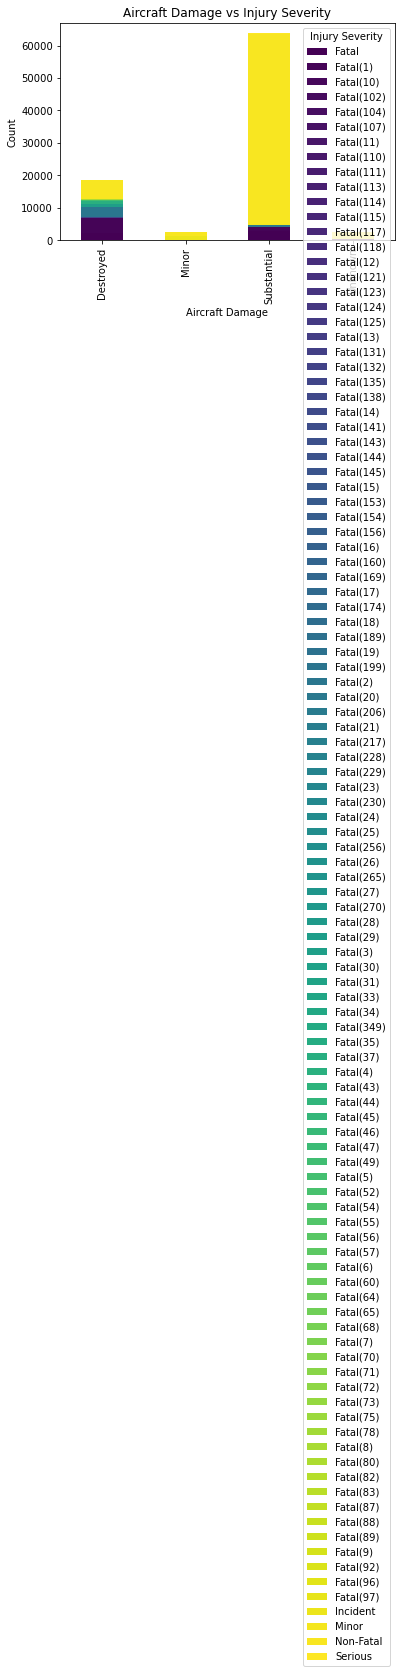

In [71]:
#Count the occurrences of each combination
count_df = df.groupby(['Aircraft.damage', 'Injury.Severity']).size().reset_index(name='Count')

#Pivot the table for better visualization
pivot_df = count_df.pivot(index='Aircraft.damage', columns='Injury.Severity', values='Count').fillna(0)

#Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

#Add labels and title
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.title('Aircraft Damage vs Injury Severity')
plt.legend(title='Injury Severity', loc='upper right')
plt.show()

## Unknown Fillers

Within a few of the columns, we have unknown values that we cant do much else with except to fill in with "unknown".
The reason for this is because even though they arent that impotant of factors, some rowsmight just be considered important enough as "outliers" or as a way to complete the data.

1. **Location and Country**: Even though they might not be important for the majority of the data, we have to consider that they might factor into **Weather Conditions**.
2. **Amateur Built**: Amateur Built can tell us whether or not the quality of certain planes is or, more importantly, is not effected by who built it. This column may end up being completely useless but "No stone unturned".

In [27]:
#Create a variable to assign to the columns
Fillers = ['Location', 'Country', 'Amateur.Built']

#Fill in NaN values with "Unknown"
df[Fillers] = df[Fillers].fillna("Unknown")

In [28]:
#Print sum missing values
df.isna().sum()

Event.Id                          0
Investigation.Type                0
Event.Date                        0
Location                          0
Country                           0
Injury.Severity                   0
Aircraft.damage                   0
Aircraft.Category                 0
Make                              0
Model                             0
Amateur.Built                     0
Number.of.Engines              5112
Engine.Type                    6060
Total.Fatal.Injuries              0
Total.Serious.Injuries            0
Total.Minor.Injuries              0
Total.Uninjured                   0
Weather.Condition              3377
Broad.phase.of.flight         25829
Make.and.Model                    0
Total.Number.of.Passengers        0
dtype: int64

## Weather Conditions and Broad Phase of Flight

First I wat to assign all **NaN** values within these two columns to "Unknown".

In [29]:
weather_and_broad_phase = ['Weather.Condition', 'Broad.phase.of.flight']

#Fill in NaN values with "Unknown"
df[weather_and_broad_phase] = df[weather_and_broad_phase].fillna("Unknown")

Now I want to know what effects the weather conditions have on these crashes.

In [30]:
# Filter data for IMC and VMC accidents
imc_accidents = df[df['Weather.Condition'] == 'IMC']
vmc_accidents = df[df['Weather.Condition'] == 'VMC']

Below we'll split up our **Injury.Severity** in order to check Fatality rates under "IMC" conditions and "VMC" conditions.

In [72]:
#Count the fatal and non-fatal accidents for IMC
imc_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Fatal']
imc_non_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Non-Fatal']
#Count the fatal and non-fatal accidents for VMC
vmc_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Fatal']
vmc_non_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Non-Fatal']


#Get the counts
num_imc_non_fatal = len(imc_non_fatal)
num_imc_fatal = len(imc_fatal)
num_vmc_non_fatal = len(vmc_non_fatal)
num_vmc_fatal = len(vmc_fatal)

print("Number of fatal accidents under IMC:", num_imc_fatal)
print("Number of non-fatal accidents under IMC:", num_imc_non_fatal)
print("Number of fatal accidents under VMC:", num_vmc_fatal)
print("Number of non-fatal accidents under VMC:", num_vmc_non_fatal)

Number of fatal accidents under IMC: 609
Number of non-fatal accidents under IMC: 2275
Number of fatal accidents under VMC: 3175
Number of non-fatal accidents under VMC: 62865


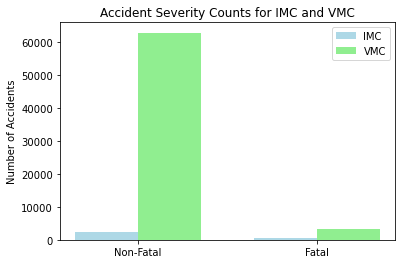

In [73]:
#Counts for IMC
imc_counts = {
    'Non-Fatal': num_imc_non_fatal,
    'Fatal': num_imc_fatal
}

#Counts for VMC
vmc_counts = {
    'Non-Fatal': num_vmc_non_fatal,
    'Fatal': num_vmc_fatal
}

#Plotting
fig, ax = plt.subplots()

#Bar width
bar_width = 0.35

#Bar positions
bar_positions_imc = range(len(imc_counts))
bar_positions_vmc = [pos + bar_width for pos in bar_positions_imc]

#Bar plots with custom colors light blue for IMC, light green for VMC)
ax.bar(bar_positions_imc, imc_counts.values(), width=bar_width, label='IMC', color='lightblue')
ax.bar(bar_positions_vmc, vmc_counts.values(), width=bar_width, label='VMC', color='lightgreen')

#X-axis ticks and labels
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_imc])
ax.set_xticklabels(imc_counts.keys())

#Labeling
ax.set_ylabel('Number of Accidents')
ax.set_title('Accident Severity Counts for IMC and VMC')
ax.legend()

#Show the plot
plt.show()

Now we'll review the values in **Broad.Phase.of.Flight**.

In [74]:
#Found all values in the phase of flight column
df['Broad.phase.of.flight'].value_counts()

Landing        15421
Takeoff        12481
Cruise         10263
Maneuvering     8138
Approach        6537
Climb           2030
Taxi            1958
Descent         1886
Go-around       1353
Standing         939
Unknown          544
Other            119
Name: Broad.phase.of.flight, dtype: int64

Let's review the frequency of accidents in each phase of flight, in order to know when we should be most cautious.

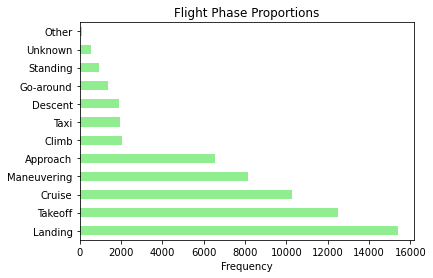

In [76]:
#Create a bar graph
df['Broad.phase.of.flight'].value_counts().plot(kind='barh', color='lightgreen')

#Labeling
plt.xlabel("Frequency")
plt.title("Flight Phase Proportions")

#Show plot
plt.show()


## Engines and Their Effect

Now we'll look at the effect engines have on a plane and whether or not it can contribute to the crash.

In [77]:
#Create a variable to assign to the columns
Fillers = ['Number.of.Engines', 'Engine.Type']

#Fill in NaN values with "Unknown"
df[Fillers] = df[Fillers].fillna("Unknown")

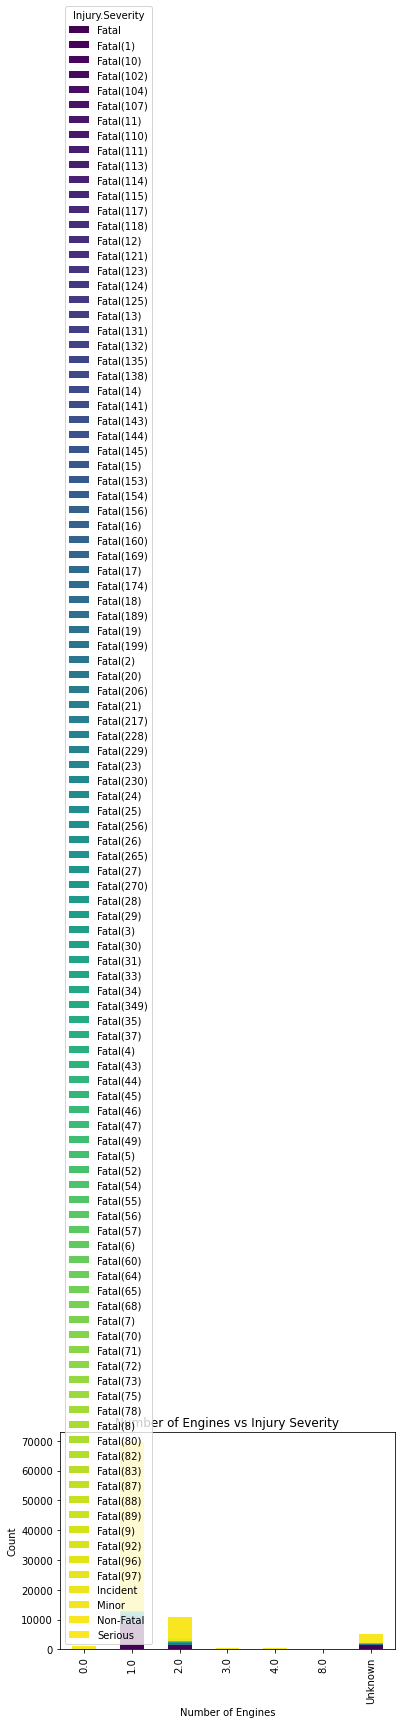

In [78]:
#Count the occurrences of each combination
count_df = df.groupby(['Number.of.Engines', 'Injury.Severity']).size().reset_index(name='Count')

#Pivot the table for better visualization
pivot_df = count_df.pivot(index='Number.of.Engines', columns='Injury.Severity', values='Count').fillna(0)

#Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

#Add labels and title
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.title('Number of Engines vs Injury Severity')
plt.show()

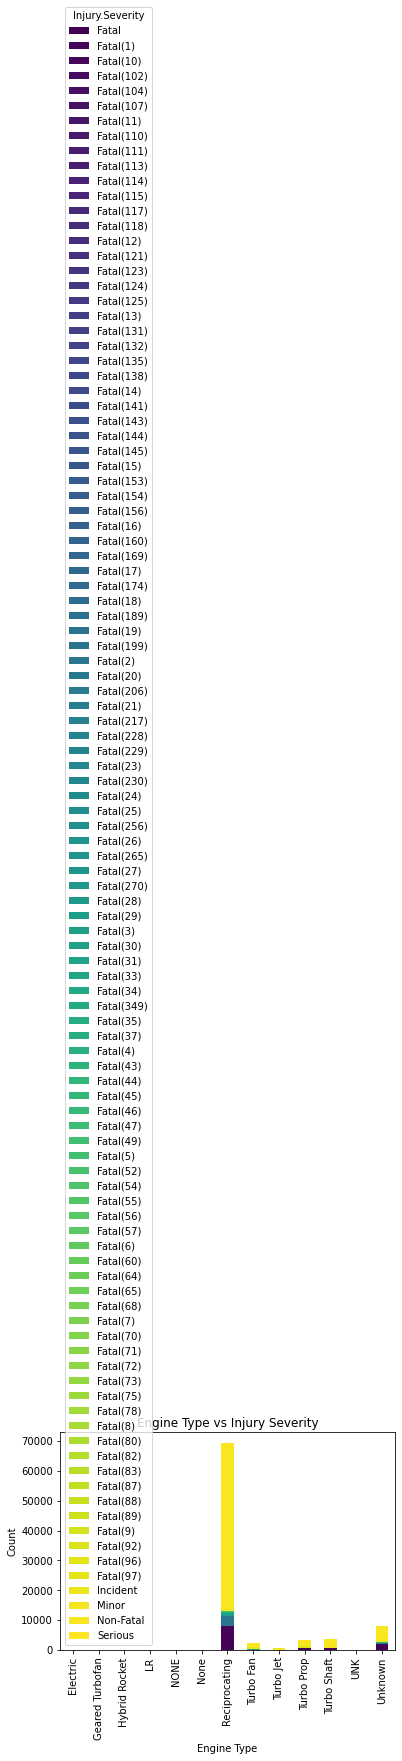

In [37]:
#Count the occurrences of each combination
count_df = df.groupby(['Engine.Type', 'Injury.Severity']).size().reset_index(name='Count')

#Pivot the table for better visualization
pivot_df = count_df.pivot(index='Engine.Type', columns='Injury.Severity', values='Count').fillna(0)

#Plot a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

#Add labels and title
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Engine Type vs Injury Severity')
plt.show()

A total of 1 "Reciprocating" engine has the most uses and largest fatality rate, we will explore this further in Tableau."

Let's check for any more NaN values.

In [79]:
df.isna().sum()

Event.Id                          0
Investigation.Type                0
Event.Date                        0
Location                         42
Country                         222
Injury.Severity                   0
Aircraft.damage                   0
Aircraft.Category                 0
Make                              0
Model                             0
Amateur.Built                    63
Number.of.Engines                 0
Engine.Type                       0
Total.Fatal.Injuries              0
Total.Serious.Injuries            0
Total.Minor.Injuries              0
Total.Uninjured                   0
Weather.Condition              3377
Broad.phase.of.flight         25829
Make.and.Model                    0
Total.Number.of.Passengers        0
dtype: int64

Perfect! now lets check percentages and central tendancies.

In [80]:
#Found the total number of entries in the dataset
print(len(df))

#Used the .describe() method to get summary statistics of the dataset
df.describe()

87498


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.of.Passengers
count,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000
mean,0.572745,0.243960,0.313779,5.040767,6.171250
std,5.166142,1.445097,2.099669,27.193009,28.039978
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,0.000000,2.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000,699.000000


## Recommendations (Closing Statement)

I want to go through the Makes and Models based off our cleaned data and give recommendations off the final results.

In [83]:
#Created a new dataframe with the total number of accidents for each make and model
number_accidents = df.groupby('Make.and.Model')['Event.Id'].count().reset_index()
number_accidents.rename(columns={'Event.Id': 'Number.Accidents'}, inplace=True)
number_accidents.head(10)

,Make.and.Model,Number.Accidents
0,107.5 FLYING CORPORATION ONE DESIGN DR 107,1
1,1200 G103,1
2,177MF LLC PITTS MODEL 12,1
3,1977 COLFER-CHAN STEEN SKYBOLT,1
4,1ST FTR GP FOCKE-WULF 190,1
5,2000 MCCOY GENESIS,1
6,2001 MCGIRL QUESTAIR VENTURE,1
7,2003 NASH KITFOX II,1
8,2007 SAVAGE AIR LLC EPIC LT,1
9,2021FX3 LLC CCX-2000,2


In [90]:
#Merge the original DataFrame 'df' with the 'number_accidents' DataFrame
df = df.merge(number_accidents, on='Make.and.Model', how='left')


I want to create new columns to manipulate later with the number of accidents and percentages of accidents.

In [91]:
#Calculate the percentage of accidents for each make and model
df['Percentage.Accidents'] = (df['Number.Accidents'] / df['Number.Accidents'].sum()) * 100

#Display the updated DataFrame
df.head(10)


,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.and.Model,Total.Number.of.Passengers,Number.Accidents_x,Percentage.Accidents,Number.Accidents_y,Number.Accidents
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,0.0,0.0,UNK,Cruise,STINSON 108-3,2.0,98,0.000441,98,98
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,...,0.0,0.0,UNK,Unknown,PIPER PA24-180,4.0,4,0.000018,4,4
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,...,0.0,0.0,IMC,Cruise,CESSNA 172M,3.0,797,0.003586,797,797
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,...,0.0,0.0,IMC,Cruise,ROCKWELL 112,2.0,9,0.000040,9,9
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,...,0.0,0.0,VMC,Approach,CESSNA 501,3.0,28,0.000126,28,28
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,...,1.0,44.0,VMC,Climb,MCDONNELL DOUGLAS DC9,45.0,1,0.000004,1,1
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Airplane,Cessna,180,...,0.0,0.0,IMC,Unknown,CESSNA 180,4.0,621,0.002794,621,621
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,2.0,VMC,Takeoff,CESSNA 140,2.0,401,0.001804,401,401
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,2.0,IMC,Landing,CESSNA 401B,2.0,8,0.000036,8,8
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,Unknown,North American,NAVION L-17B,...,3.0,0.0,IMC,Cruise,NORTH AMERICAN NAVION L-17B,3.0,1,0.000004,1,1


In [93]:
#Merge the original DataFrame with the number_accidents DataFrame
df = pd.merge(df, number_accidents, on='Make.and.Model', how='left')

#Display the updated DataFrame
df.head(10)


,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Weather.Condition,Broad.phase.of.flight,Make.and.Model,Total.Number.of.Passengers,Number.Accidents_x,Percentage.Accidents,Number.Accidents_y,Number.Accidents_x,Number.Accidents_y,Number.Accidents
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,...,UNK,Cruise,STINSON 108-3,2.0,98,0.000441,98,98,98,98
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,...,UNK,Unknown,PIPER PA24-180,4.0,4,0.000018,4,4,4,4
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,...,IMC,Cruise,CESSNA 172M,3.0,797,0.003586,797,797,797,797
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,...,IMC,Cruise,ROCKWELL 112,2.0,9,0.000040,9,9,9,9
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,...,VMC,Approach,CESSNA 501,3.0,28,0.000126,28,28,28,28
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,...,VMC,Climb,MCDONNELL DOUGLAS DC9,45.0,1,0.000004,1,1,1,1
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Airplane,Cessna,180,...,IMC,Unknown,CESSNA 180,4.0,621,0.002794,621,621,621,621
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,VMC,Takeoff,CESSNA 140,2.0,401,0.001804,401,401,401,401
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,IMC,Landing,CESSNA 401B,2.0,8,0.000036,8,8,8,8
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,Unknown,North American,NAVION L-17B,...,IMC,Cruise,NORTH AMERICAN NAVION L-17B,3.0,1,0.000004,1,1,1,1


In [94]:
#Select relevant columns including the accident percentages
selected_columns = ['Make.and.Model', 'Aircraft.damage', 'Injury.Severity', 'Weather.Condition', 'Broad.phase.of.flight', 'Number.of.Engines', 'Percentage.Accidents']

#Create a new DataFrame with selected columns
selected_df = df[selected_columns]

#Drop rows with missing values
selected_df = selected_df.dropna()

#Convert 'Aircraft.damage' to numerical values for comparison
damage_mapping = {'Substantial': 2, 'Minor': 1, 'Destroyed': 3}
selected_df['Aircraft.damage'] = selected_df['Aircraft.damage'].map(damage_mapping)

#Convert 'Injury.Severity' to numerical values for comparison
injury_mapping = {'Minor': 1, 'Serious': 2, 'Fatal': 3}
selected_df['Injury.Severity'] = selected_df['Injury.Severity'].map(injury_mapping)

#Group by 'Make.and.Model' and calculate the sum for each group
grouped_df = selected_df.groupby('Make.and.Model').sum()

#Sort the DataFrame by least accident percentages
sorted_df = grouped_df.sort_values(by='Percentage.Accidents', ascending=True)

#Display the result (top rows have the lowest accident percentages)
result = sorted_df.head(3)
print(result)


                    Aircraft.damage  Injury.Severity  Percentage.Accidents
Make.and.Model                                                            
1200 G103                       2.0              0.0              0.000004
MADSEN LANCAIR 320              3.0              0.0              0.000004
MADSEN RANS S-12                2.0              0.0              0.000004


In [ ]:
df.head()

Based off the data above, here are the top 3 with the least amount of damage/fatality rates:
    
   
   1. 1200 G103                     
   2. MADSEN LANCAIR 320              
   3. MADSEN RANS S-12                                        

Though these have the least amonut of flights.
 
Based off my Tableau graphs (which will be displayed in summary and dashboards), the top 3 aircrafts, based on number of flights compared to damage is (in order):
 
   1. BOEING 737
   2. BOEING 777
   3. BOEING 767
   
The typical engine type for these planes is a **Turbo Fan**, 
averaging 1-2 per plane.   

I'd also take a look at **CESSNA 152**.
It has well over 5 million crashes, and although most of them are labeled "Substantial", it has the least amount of deaths when compared, percentage wise, to all others in my top 20 list on Tableau.

Its time to re-assign the dataset and close it for further use.

In [169]:
df.to_csv('data/Aviation_Data_Cleaned.csv')